/home/d9eka/anaconda3/lib/python3.11/site-packages/gspread/worksheet.py:1069: UserWarning: [Deprecated][in version 6.0.0]: method signature will change to: 'Worksheet.update(value = [[]], range_name=)' arguments 'range_name' and 'values' will swap, values will be mandatory of type: 'list(list(...))'
  warnings.warn(


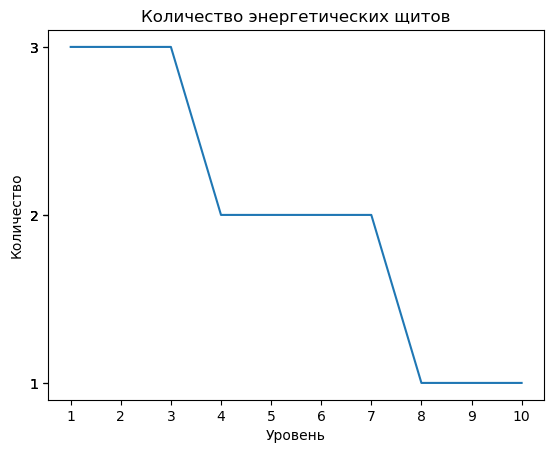

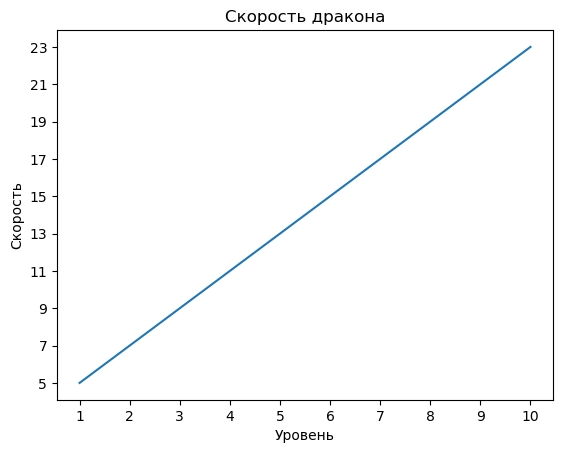

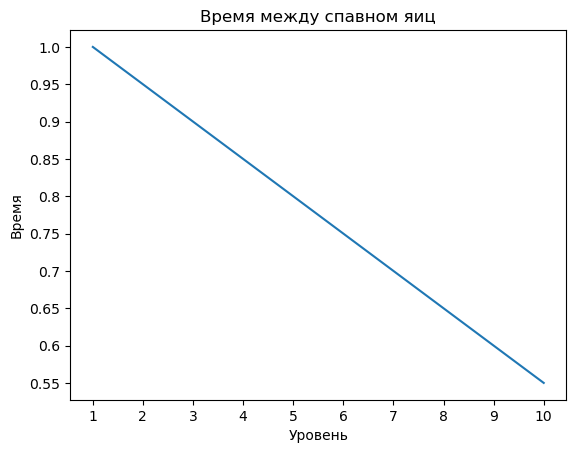

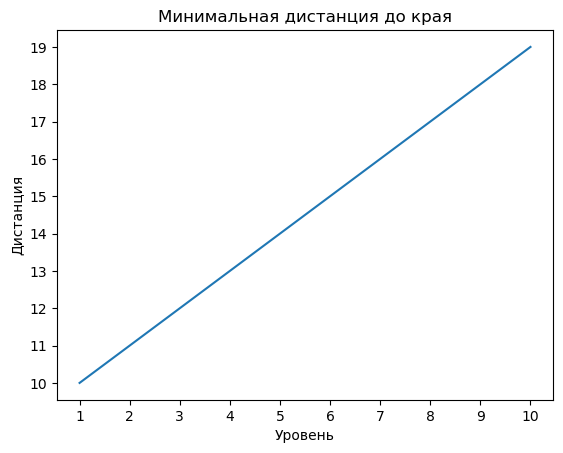

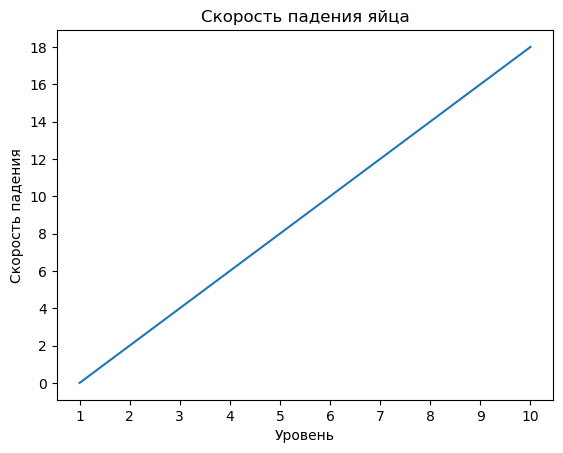

In [3]:
import math
import gspread
import numpy as np
from matplotlib import pyplot as plt 

gc = gspread.service_account(filename='da-in-gamedev-3-20461027edd2.json')
sh = gc.open("DA-in-GameDev-3")

level_count = 10
levels = [i+1 for i in range(level_count)]

shields_num_array = [3, 3, 3, 2, 2, 2, 2, 1, 1, 1]
shields_num_table_start_index = 0

dragon_speed_start = 5
dragon_speed_modifier = 2
dragon_speed_table_start_index = 10

dragon_time_between_egg_drop_start = 1
dragon_time_between_egg_drop_modifier = -0.05
dragon_time_between_egg_drop_table_start_index = 20

dragon_left_right_distance_start = 10
dragon_left_right_distance_modifier = 1
dragon_left_right_distance_table_start_index = 30

dragon_egg_speed_start = 0
dragon_egg_speed_modifier = 2
dragon_egg_speed_table_start_index = 40


def create_array_modifier(length, startNum, modifier):
    array = []
    for i in range(length):
        array.append(round(startNum + (i * modifier), 2))
    return array

def int_to_column_index(num):
    num += 65
    if(num <= 90):
        return chr(num)
    return 'A' + int_to_column_index(num - 91)

def update_table(values, start_index):
      for i in range(len(values)):
            sh.sheet1.update((int_to_column_index(start_index + i) + "3"), values[i])

def create_graph(x_array, y_array, title, x_label, y_label):
    plt.plot(x_array, y_array)  
    plt.title(title)
    plt.xticks(ticks=x_array, labels=x_array)
    plt.yticks(ticks=y_array, labels=y_array)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

update_table(shields_num_array, shields_num_table_start_index)
create_graph(levels, shields_num_array, "Количество энергетических щитов", "Уровень", "Количество")
            
dragon_speed_array = create_array_modifier(level_count, dragon_speed_start, dragon_speed_modifier)
update_table(dragon_speed_array, dragon_speed_table_start_index)
create_graph(levels, dragon_speed_array, "Скорость дракона", "Уровень", "Скорость")

dragon_time_between_egg_drop_array = create_array_modifier(level_count, dragon_time_between_egg_drop_start, dragon_time_between_egg_drop_modifier)
update_table(dragon_time_between_egg_drop_array, dragon_time_between_egg_drop_table_start_index)
create_graph(levels, dragon_time_between_egg_drop_array, "Время между спавном яиц", "Уровень", "Время")

dragon_left_right_distance_array = create_array_modifier(level_count, dragon_left_right_distance_start, dragon_left_right_distance_modifier)
update_table(dragon_left_right_distance_array, dragon_left_right_distance_table_start_index)
create_graph(levels, dragon_left_right_distance_array, "Минимальная дистанция до края", "Уровень", "Дистанция")

dragon_egg_speed_array = create_array_modifier(level_count, dragon_egg_speed_start, dragon_egg_speed_modifier)
update_table(dragon_egg_speed_array, dragon_egg_speed_table_start_index)
create_graph(levels, dragon_egg_speed_array, "Скорость падения яйца", "Уровень", "Скорость падения")